# Unit 5 - Financial Planning


In [26]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [27]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [28]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [29]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [30]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


The current value of your 1.2 BTC is $22255.58
The current value of your 5.3 ETH is $2847.27


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [41]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [32]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("alpaca_API_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [36]:
# Format current date as ISO format
today = pd.Timestamp('2020-11-18', tz="America/New_York").isoformat()

# Set the tickers
tickers = ["SPY", "AGG"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
investments_df = alpaca.get_barset(tickers, timeframe, start = today).df

# Preview DataFrame
investments_df.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
2020-11-18 00:00:00-05:00  117.95  117.99  117.89  117.965  4880892  360.91   
2020-11-19 00:00:00-05:00  118.08  118.26  118.03  118.180  5807639  355.61   
2020-11-20 00:00:00-05:00  118.19  118.34  118.13  118.290  5496191  357.50   

                                                             
                             high     low   close    volume  
2020-11-18 00:00:00-05:00  361.50  356.24  356.29  57605438  
2020-11-19 00:00:00-05:00  358.18  354.15  357.76  47610697  
2020-11-20 00:00:00-05:00  357.72  355.25  355.34  47947194

In [39]:
# Pick AGG and SPY close prices
agg_close_price = round(investments_df[tickers[0]]['close'][0],2)
spy_close_price = round(investments_df[tickers[1]]['close'][0],2)

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $356.29
Current SPY closing price: $117.96


In [42]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $5898.00
The current value of your 200 AGG shares is $71258.00


### Savings Health Analysis

In [44]:
# Set monthly household income
mo_income = 12000

# Create savings DataFrame
#create a list for assets
savings_data = [
    my_btc_value+my_eth_value,
    my_agg_value+my_spy_value
]
#create a DataFrame
df_savings = pd.DataFrame(savings_data, columns=['amount'],index=['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,25102.85
shares,77156.00


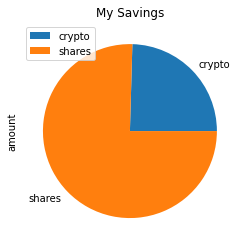

In [45]:
# Plot savings pie chart
df_savings.plot.pie(y='amount',title='My Savings');

In [48]:
# Set ideal emergency fund
emergency_fund = mo_income * 3

# Calculate total amount of savings
my_savings = float(df_savings.sum())

# Validate saving health
if my_savings >= emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")

else:
    print("You need to save more!")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [49]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-11-18', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-11-18', tz='America/New_York').isoformat()

In [50]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers, 
    timeframe, 
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open    high       low   close     volume   
2015-11-18 00:00:00-05:00  108.65  108.71  108.5400  108.62  1824597.0   
2015-11-19 00:00:00-05:00  108.76  108.90  108.6800  108.68  2655263.0   
2015-11-20 00:00:00-05:00  108.77  108.82  108.6000  108.62  1893587.0   
2015-11-23 00:00:00-05:00  108.65  108.76  108.5700  108.68  1595639.0   
2015-11-24 00:00:00-05:00  108.75  108.80  108.6611  108.73  1153821.0   

                              SPY                                    
                             open    high     low   close    volume  
2015-11-18 00:00:00-05:00  206.04  208.90  205.99  208.71  94448031  
2015-11-19 00:00:00-05:00  208.59  209.05  208.20  208.53  61897641  
2015-11-20 00:00:00-05:00  209.45  210.12  208.86  209.35  67021762  
2015-11-23 00:00:00-05:00  209.38  209.98  208.52  209.06  54738608  
2015-11-24 00:00:00-05:00  207.87  209.83  207.41  209.38  81748691

In [51]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5,.5],
    num_simulation = 100,
    num_trading_days = 252*30
)

In [52]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994434,1.008640,1.004002,1.007947,0.999408,1.002733,0.997799,0.998769,1.013603,1.003135,...,0.991672,1.000007,0.993998,0.987211,0.993236,1.004552,1.006933,0.998175,0.983619,0.992394
2,0.990167,1.009497,1.014133,1.015924,0.994549,0.998080,0.997019,1.002129,1.010735,1.004330,...,1.004995,0.998426,0.991119,0.995378,1.006172,1.002574,1.013896,1.000965,0.982163,0.996135
3,0.987790,1.017762,1.018965,1.023256,0.991817,0.994314,1.000496,0.993009,1.012161,1.010804,...,1.002750,0.989013,0.987245,0.995226,1.003958,1.005757,1.010730,1.005732,0.986593,0.999859
4,0.982380,1.018807,1.016917,1.031261,0.991745,0.993292,1.004334,0.996704,0.989661,1.005131,...,1.000432,0.979783,0.987231,0.994965,1.010076,1.009774,1.008346,1.012366,0.986415,1.006219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.993440,9.031828,7.745102,7.036866,7.144721,5.003268,6.051985,8.864826,3.409810,8.255791,...,6.134889,5.071115,3.492461,8.524544,6.659686,21.624261,8.031992,7.630753,7.762207,7.768596
7557,7.021401,9.109069,7.675899,7.052277,7.153040,5.006426,6.103767,8.830060,3.438879,8.272220,...,6.177466,5.154585,3.477135,8.521628,6.672619,21.598426,8.018597,7.652612,7.748983,7.698546
7558,7.017515,9.082697,7.643844,6.954476,7.180251,5.060062,6.060675,8.854338,3.466236,8.353007,...,6.173595,5.129334,3.486513,8.493319,6.807999,21.514036,8.021596,7.633542,7.700184,7.679728
7559,6.989967,9.088383,7.627237,6.896848,7.115488,5.038347,6.036826,8.903709,3.458936,8.330793,...,6.198408,5.143191,3.481619,8.435591,6.775490,21.588591,8.083385,7.570880,7.627061,7.654111


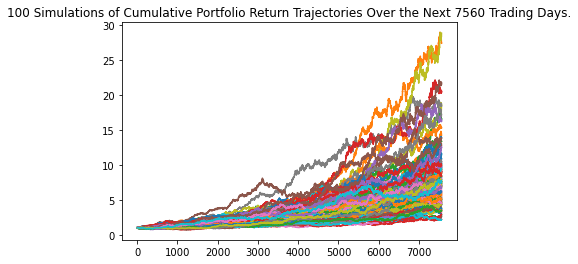

In [53]:
# Plot simulation outcomes
line_plot = MC_30yr.plot_simulation()

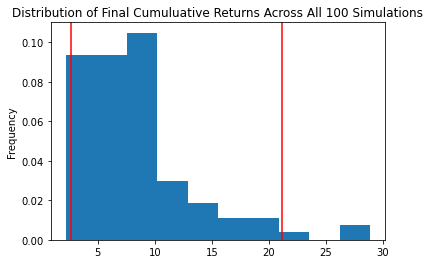

In [54]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30yr.plot_distribution()

### Retirement Analysis

In [55]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30yr.summarize_cumulative_return()


# Print summary statistics
print(tbl)

count           100.000000
mean              8.389223
std               5.014306
min               2.192520
25%               4.908042
50%               7.508583
75%               9.751332
max              28.873866
95% CI Lower      2.655722
95% CI Upper     21.166541
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [64]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[-2] * int_investment,2)
ci_upper = round(tbl[-1] * int_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $79671.67 and $634996.24


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [58]:
# Set initial investment
int_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[-2] * int_investment,2)
ci_upper = round(tbl[-1] * int_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $79671.67 and $634996.24


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [59]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5,.5],
    num_simulation = 100,
    num_trading_days = 252*5
)

In [60]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003473,0.997013,0.997510,1.009012,0.989973,1.005453,0.991859,1.005041,0.993522,0.999339,...,1.001479,1.002244,1.005509,0.987693,1.013251,1.005836,0.999846,0.999832,1.006539,1.002415
2,0.997312,1.015535,0.992290,1.005640,0.977521,1.000811,0.988567,1.008353,0.995853,0.997774,...,0.998394,1.004856,1.007442,0.994041,1.021148,1.012239,0.994095,0.999911,1.019372,1.009738
3,0.996532,1.018811,0.993778,1.004377,0.979604,0.990152,0.985756,1.004652,1.000088,1.000573,...,1.000698,1.009974,1.008020,1.002437,1.019205,1.020477,1.006831,1.001509,1.021389,1.008546
4,0.995533,1.011498,0.993987,1.005582,0.968066,1.002828,0.989592,1.000607,1.007115,1.006386,...,1.004178,1.009712,1.007763,1.018488,1.032597,1.027690,0.998374,1.009888,1.013448,1.011459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.046922,1.576529,1.032625,1.878141,1.284388,1.116352,2.009601,1.056996,1.299728,1.421588,...,1.464878,1.523750,1.418932,1.725752,1.674339,1.140689,1.804032,1.653209,1.128448,1.773375
1257,1.048657,1.567287,1.034167,1.873785,1.296839,1.132991,2.002220,1.060488,1.287959,1.428446,...,1.466220,1.533452,1.420134,1.731818,1.678878,1.139464,1.787107,1.651313,1.133352,1.788133
1258,1.043739,1.567446,1.024486,1.854226,1.300585,1.135795,1.995929,1.068257,1.289730,1.435105,...,1.459473,1.527632,1.427617,1.734966,1.675745,1.142104,1.800221,1.658083,1.142536,1.787969
1259,1.044800,1.558432,1.019714,1.860555,1.308801,1.132735,1.982798,1.067866,1.287672,1.429350,...,1.460862,1.534041,1.427973,1.754498,1.683232,1.145072,1.829755,1.650874,1.148717,1.786326


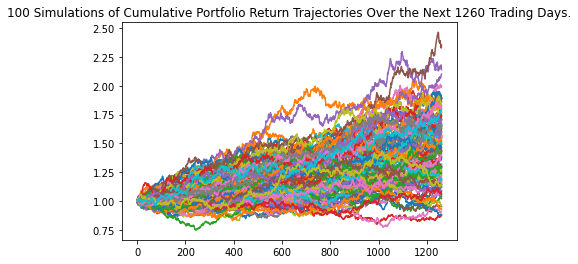

In [61]:
# Plot simulation outcomes
line_plot_5 = MC_5yr.plot_simulation()

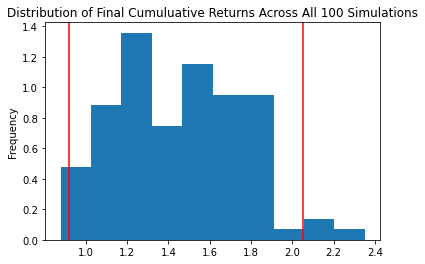

In [62]:
# Plot probability distribution and confidence intervals
dist_plot_5 = MC_5yr.plot_distribution()

In [63]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5 = MC_5yr.summarize_cumulative_return()

# Print summary statistics
print(tbl_5)

count           100.000000
mean              1.457477
std               0.307283
min               0.877507
25%               1.212540
50%               1.452157
75%               1.669273
max               2.350701
95% CI Lower      0.919071
95% CI Upper      2.049437
Name: 1260, dtype: float64


In [67]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5 = round(tbl_5[-2] * int_investment,2)
ci_upper_5 = round(tbl_5[-1] * int_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5} and ${ci_upper_5}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $27572.12 and $61483.12


### Ten Years Retirement Option

In [68]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5,.5],
    num_simulation = 100,
    num_trading_days = 252*10
)

In [69]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002944,0.997109,0.996009,0.994087,1.003252,1.004501,1.005822,0.992122,1.001107,0.998907,...,1.001008,1.000689,0.994487,0.996104,1.000195,1.000772,0.996734,0.991866,0.997964,1.002828
2,1.003681,1.000981,0.989311,0.989856,0.993383,0.994724,0.996053,0.981992,0.993239,1.006359,...,1.012288,1.003088,0.990608,0.994478,0.999112,1.005738,1.000595,0.997369,0.994757,0.992104
3,1.002584,1.000088,0.996400,0.987353,1.000110,0.996041,0.993124,0.979154,0.996659,1.012536,...,1.006130,1.003859,0.985026,0.987524,0.983960,1.011388,0.998806,1.001370,0.995855,0.988035
4,1.001631,0.998986,1.000870,0.980514,1.000402,0.988792,0.990667,0.972538,0.996467,1.009995,...,1.005187,0.997866,0.988207,0.992583,0.998141,1.017499,0.996372,0.997358,0.996817,0.978809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.572738,2.126583,1.700893,2.051889,1.335076,1.845016,1.080601,1.820926,1.728837,2.472394,...,1.617733,1.279334,2.248628,1.796577,1.410272,1.788734,1.999283,3.416555,2.133624,2.614957
2517,1.578114,2.154807,1.688185,2.060349,1.338547,1.861880,1.078398,1.824608,1.731741,2.485523,...,1.588903,1.280410,2.251102,1.790837,1.413353,1.809891,1.999165,3.381431,2.135486,2.640547
2518,1.564199,2.158246,1.698505,2.078381,1.354024,1.853814,1.078371,1.836717,1.723167,2.491094,...,1.593094,1.282027,2.240970,1.800639,1.407266,1.803125,1.999604,3.366291,2.163181,2.641512
2519,1.577860,2.151645,1.699103,2.075506,1.359843,1.877630,1.082392,1.833021,1.711768,2.499961,...,1.589070,1.291168,2.222753,1.805764,1.408924,1.801949,1.990388,3.394169,2.173444,2.650414


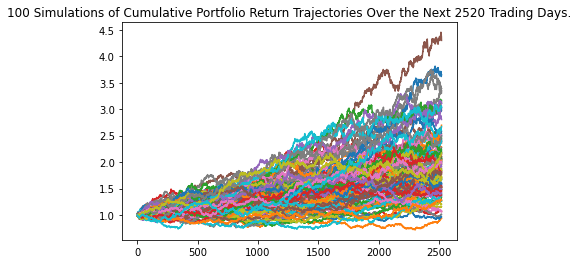

In [70]:
# Plot simulation outcomes
line_plot_10 = MC_10yr.plot_simulation()

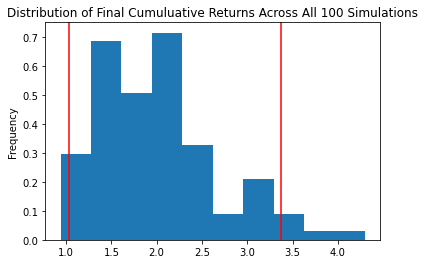

In [71]:
# Plot probability distribution and confidence intervals
dist_plot_10 = MC_10yr.plot_distribution()

In [73]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10 = MC_10yr.summarize_cumulative_return()
# Print summary statistics
print(tbl_10)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
count           100.000000
mean              2.102633
std               0.764057
min               1.021003
25%               1.560634
50%               1.953356
75%               2.622110
max               5.887735
95% CI Lower      1.110147
95% CI Upper      3.408220
Name: 2520, dtype: float64


In [74]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10 = round(tbl_10[-2] * int_investment,2)
ci_upper_10 = round(tbl_10[-1] * int_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10} and ${ci_upper_10}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $33304.4 and $102246.59
